# Problema del vendedor viajero (TSP)



<img src= "https://images2.minutemediacdn.com/image/upload/c_fill,g_auto,h_348,w_520/v1555322749/shape/mentalfloss/tsp-hero.jpg?itok=i51T-GNb">

El problema del vendedor viajero (TSP por sus siglas en inglés (Travelling Salesman Problem) responde a la siguiente pregunta: dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen? Este es un problema NP-Hard dentro en la optimización combinatoria, muy importante en investigación operativa y en ciencias de la computación.

El TSP puede ser formulado por la programación lineal en enteros. Sea $x_{ij}$ igual 1, si existe el camino de ir de la $i$ a la ciudad $j$, y 0 en otro caso, para el conjunto de ciudades 0,..., $n$. Sean $u_{i}$ para i = 1,..., $n$ variables artificiales y sea $c_{ij}$ la distancia desde la ciudad i a la ciudad j. Entonces el modelo de programación lineal en enteros puede ser escrito como:

<img src= "https://wikimedia.org/api/rest_v1/media/math/render/svg/230580159a1a27a159cd9b4654954e8a590c67d2">


# Crecimiento exponencial

En el problema se presentan $N!$ rutas posibles, aunque se puede simplificar ya que dada una ruta nos da igual el punto de partida y esto reduce el número de rutas a examinar en un factor $N$ quedando $(N-1)!$. Como no importa la dirección en que se desplace el viajante, el número de rutas a examinar se reduce nuevamente en un factor 2. Por lo tanto, hay que considerar $(N-1)!/2$ rutas posibles.

En la práctica, para un problema del viajante con 5 ciudades hay $(5-1)!/2=12$ rutas diferentes y no necesitamos un ordenador para encontrar la mejor ruta, pero apenas aumentamos el número de ciudades las posibilidades crece factorialmente:

Para 10 ciudades hay $(10-1)!/2=181.440$ rutas diferentes
Para 30 ciudades hay más de $(4·10)^{30}$ rutas posibles. Un ordenador que calcule un millón de rutas por segundo necesitaría $10^{17}$ años para resolverlo. Dicho de otra forma, si se hubiera comenzado a calcular al comienzo de la creación del universo (hace unos 13.400 millones de años) todavía no se habría terminado.

Puede comprobarse que por cada ciudad nueva que incorporemos, el número de rutas se multiplica por el factor $N$ y crece factorialmente. Por ello el problema pertenece a la clase de problemas NP-completos.

Tomado de https://es.wikipedia.org/wiki/Problema_del_viajante

# Parámetros de prueba

A continuación, se presentan los parámetros de prueba de nuestro problema del TSP

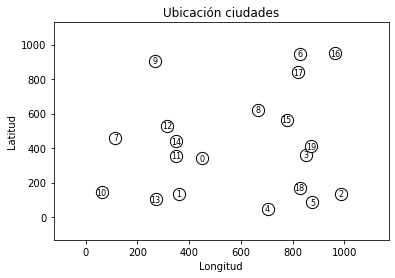

In [1]:
import numpy as np #Vamos a utilizar la libreria numpy
import operator #Paquete para ordenar un diccionario
import time #Paquete para medir el tiempo computacional
import matplotlib.pyplot as plt
import networkx as nx

def obj_cal(sol, c_ij):
    FO_1=0
    for x in range(len(sol)-1):
        FO_1+=c_ij[sol[x], sol[x+1]]
    return FO_1

def Grafica_Ruta(N, Route=[]):
    if len(Route) > 0:
        G = nx.DiGraph(Route)
    else:
        G = nx.DiGraph()
    G.add_nodes_from(N)
    options = {
        "font_size": 8,
        "node_size": 150,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }
    fig, ax = plt.subplots()
    nx.draw_networkx(G, coor, **options)
    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis('on')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.xlabel('Longitud') 
    plt.ylabel('Latitud')
    plt.title('Ubicación ciudades') 
    plt.show()    
    
np.random.seed(8) 

n = 20 #Número de ciudades

size_grid = 1000 

#Coordenadas (x,y) de las ciudades
coor = {i:(np.random.randint(0, size_grid), np.random.randint(0, size_grid)) for i in range(n)} 

#Costo de ir de la ciudad i a la ciudad j (Distancia)
c_ij = {(i,j):(round(np.sqrt(((coor[i][0]-coor[j][0])**2)+((coor[i][1]-coor[j][1])**2)),0) if i!=j else 1000000) 
        for i in range(n) for j in range(n)}

N = range(n)
# Código para graficar las ciudades

Grafica_Ruta(N)

# Codificación

El TSP puede ser codificado con un vector de tamaño $n+1$. La posición del vector corresponde al orden en el que se visitan las ciudades y el contenido de la posición indica la ciudad que se está visitando. En esta codificación la posición 0 y n-1 sera el cuenta el depot (0) dado que se tiene que partir y regresar a esta ciudad obligatoriamente. 

Esta codificación también se puede realizar utilizando listas en Python. 

<img src="https://i.ibb.co/1rMb5Rf/Codificaci-n-TSP.png" alt="Codificaci-n-TSP" border="0">

# Algoritmo constructivo 

Hoy veremos un algoritmo constructivo voraz para el problema del TSP. El algoritmo consiste en seleccionar siempre el arco de menor costo e ir construyendo la ruta. El algoritmo termina cuando todas las ciudades se encuentran en la ruta. 

Este algoritmo recibe el nombre "vecino más cercano". En el siguiente código se encuentra el algoritmo constructivo

La solución encontrada es [0, 11, 14, 12, 7, 10, 13, 1, 4, 18, 5, 2, 3, 19, 15, 8, 17, 6, 16, 9, 0]
Es costo de esta solución es 4294.0
Tiempo de cómputo del algoritmo de vecino más cercado es 0.00071 segundos


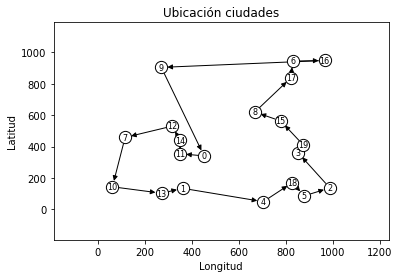

In [19]:
solucion = [0]
Copia_cij = c_ij.copy()
Tiempo_inicio = time.time()
FO = 0
Cabeza = 0
Route = []
while(len(solucion)<n):
    
    minimo = 99999
    for i in range(n): 
        if Copia_cij[Cabeza,i]<minimo:
            minimo = Copia_cij[Cabeza, i]
            Cola = i
        Copia_cij[i, Cabeza] = 1000000
    
    FO += minimo
    solucion.append(Cola)
    Route.append((Cabeza, Cola))
    Cabeza=Cola       

FO+=c_ij[Cola, 0]
Route.append((Cabeza, 0))
solucion.append(0)

Tiempo_fin =time.time()-Tiempo_inicio
print(f"La solución encontrada es {solucion}")
print(f"Es costo de esta solución es {FO}")
print(f"Tiempo de cómputo del algoritmo de vecino más cercado es {round(Tiempo_fin,5)} segundos")
Grafica_Ruta(N, Route)

# Búsqueda local

Los algoritmos de búsqueda local para el problema del TSP se componen de operadores de transición en la vecindad. Estos operadores miden que tan buena es una transición según los arcos que se deban remover y agregar al tour. El día de hoy veremos los operadores de insert, swap y 2-opt. Todos bajo la filosofia de primera mejora. 

## Insert

El operador de Insert consiste en seleccionar una ciudad e insertarla en las diferentes posiciones de la ruta construida. En este caso, buscamos insertar lo que se encuentra en la posición $ii$ al frente de lo que esta en la posición $jj$. 

<img src="https://i.ibb.co/fMvZVSp/Insert.png" alt="Insert" border="0">

Solucion inicial [0, 11, 14, 12, 7, 10, 13, 1, 4, 18, 5, 2, 3, 19, 15, 8, 17, 6, 16, 9, 0], 
 FO 4294.0
Inserta 12
En frente de 9
4238.0
Inserta 14
En frente de 12
4178.0
Inserta 18
En frente de 2
4176.0
Inserta 6
En frente de 16
4114.0
Solucion final [0, 11, 7, 10, 13, 1, 4, 5, 2, 18, 3, 19, 15, 8, 17, 16, 6, 9, 12, 14, 0], 
 FO 4114.0
Tiempo de cómputo de la búsqueda local 0.00083 segundos
Número de movimientos requeridos para converger 4


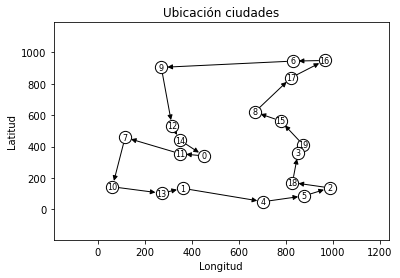

In [6]:
Tiempo_inicio = time.time()
print(f"Solucion inicial {solucion}, \n FO {FO}")
Movimientos = 0
repite = True
while repite == True:

    Hubo_cambio = False

    for i in range(len(solucion)-2):
        ii = i + 1
        iii = ii + 1
        
        for j in range(len(solucion)-2):
            jj = j + 1
            jjj = jj + 1
            
            if ii!=jj:
                
                Actual = c_ij[solucion[i], solucion[ii]] + c_ij[solucion[ii], solucion[iii]] + c_ij[solucion[jj],solucion[jjj]]
                New = c_ij[solucion[i], solucion[iii]] + c_ij[solucion[jj], solucion[ii]] + c_ij[solucion[ii], solucion[jjj]]
                ahorro = New - Actual
                
                if ahorro < 0:
                
                    print(f"Inserta {solucion[ii]}")
                    print(f"En frente de {solucion[jj]}")

                    solucion.insert(jj+1, solucion[ii])

                    if jj > ii:
                        solucion.pop(ii)
                    else:
                        solucion.pop(ii+1)

                    FO+=ahorro
                    print(f"FO: {FO}")
                    
                    Hubo_cambio  =True
                    break
        
        if Hubo_cambio == True:
            break
            
    if Hubo_cambio == True:
        Movimientos+=1
        repite = True
    else:
        repite = False
        
print(f"Solucion final {solucion}, \n FO {FO}")
print(f"Tiempo de cómputo de la búsqueda local {round(Tiempo_fin,5)} segundos")
print(f"Número de movimientos requeridos para converger {Movimientos}")

Route = []
for i in solucion:
    Route.append((solucion[i], solucion[i+1]))
    
Grafica_Ruta(N, Route)

## Swap

El operador Swap consiste en intercambiar dos posiciones de la ruta construida. En este caso, buscamos intercambiar lo que se encuentra en la posición $ii$ con lo que se encuentra en la posiciòn $jj$. 

<img src="https://i.ibb.co/fMvZVSp/Insert.png" alt="Insert" border="0">

Solucion inicial [0, 11, 14, 12, 7, 10, 13, 1, 4, 18, 5, 2, 3, 19, 15, 8, 17, 6, 16, 9, 0], 
 FO 4294.0
Swap de  6
con 16
FO: 4232.0
Solucion final [0, 11, 14, 12, 7, 10, 13, 1, 4, 18, 5, 2, 3, 19, 15, 8, 17, 16, 6, 9, 0], 
 FO 4232.0
Tiempo de cómputo de la búsqueda local 0.00074 segundos
Número de movimientos requeridos para converger 1


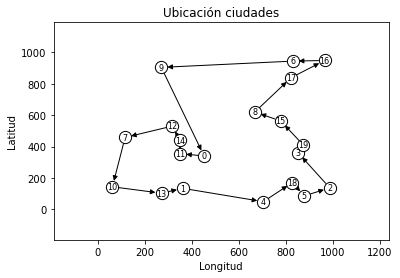

In [8]:
Tiempo_inicio = time.time()
print(f"Solucion inicial {solucion}, \n FO {FO}")
Movimientos = 0
repite = True
while repite == True:

    Hubo_cambio = False

    for i in range(len(solucion)-2):
        ii = i + 1
        iii = ii + 1
        
        for j in range(i+1, len(solucion)-2):
            jj = j + 1
            jjj = jj + 1
            
            if ii!=jj:
                
                if jj!=ii+1:
                    
                    Actual = c_ij[solucion[i], solucion[ii]] + c_ij[solucion[ii], solucion[iii]] + c_ij[solucion[j],solucion[jj]] + c_ij[solucion[jj],solucion[jjj]]                           
                    New = c_ij[solucion[i], solucion[jj]] + c_ij[solucion[jj], solucion[iii]] + c_ij[solucion[j],solucion[ii]] + c_ij[solucion[ii],solucion[jjj]]
                
                else:
                    
                    Actual = c_ij[solucion[i], solucion[ii]] + c_ij[solucion[jj],solucion[jjj]]                           
                    New = c_ij[solucion[i], solucion[jj]] + c_ij[solucion[ii],solucion[jjj]]
                         
                ahorro = New - Actual
                
                if ahorro < 0:

                    print(f"Swap de  {solucion[ii]}")
                    print(f"con {solucion[jj]}")

                    sol_copia = solucion.copy()

                    solucion[ii] = sol_copia[jj]
                    solucion[jj] = sol_copia[ii]
                    
                    FO+=ahorro
                    print(f"FO: {FO}")
                    
                    Hubo_cambio  =True
                    break
        
        if Hubo_cambio == True:
            break
            
    if Hubo_cambio == True:
        Movimientos+=1
        repite = True
    else:
        repite = False
        
print(f"Solucion final {solucion}, \n FO {FO}")
print(f"Tiempo de cómputo de la búsqueda local {round(Tiempo_fin,5)} segundos")
print(f"Número de movimientos requeridos para converger {Movimientos}")

Route = []
for i in solucion:
    Route.append((solucion[i], solucion[i+1]))
    
Grafica_Ruta(N, Route)

# 2-OPT

El algoritmo 2-opt es una de las heurísticas más básicas y ampliamente utilizadas para obtener una solución aproximada del problema TSP. 2-opt comienza con un recorrido inicial aleatorio y mejora el recorrido de forma incremental intercambiando 2 aristas en el recorrido con otras dos aristas.

<img src= "https://www.researchgate.net/profile/Haris-Hasic-3/publication/320799889/figure/fig6/AS:556188186181639@1509617005733/Example-of-2-opt-move.png">

Tomado de http://matejgazda.com/tsp-algorithms-2-opt-3-opt-in-python/

Solucion inicial [0, 11, 14, 12, 7, 10, 13, 1, 4, 18, 5, 2, 3, 19, 15, 8, 17, 16, 6, 9, 0], 
 FO 4232.0
Solucion final [0, 11, 14, 12, 7, 10, 13, 1, 4, 18, 5, 2, 3, 19, 15, 8, 17, 16, 6, 9, 0], 
 FO 4232.0
Tiempo de cómputo de la búsqueda local 3.94653 segundos
Número de movimientos requeridos para converger 0


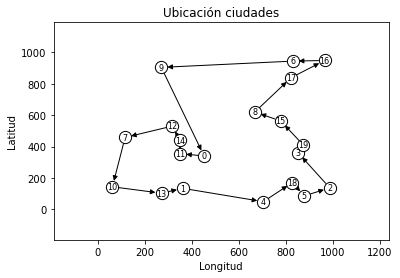

In [23]:
print(f"Solucion inicial {solucion}, \n FO {FO}")
Tiempo_inicio = time.time()
Movimientos = 0

def _swap_2opt(route, i, k):
    """ Swapping the route """
    new_route = route[0:i]
    new_route.extend(reversed(route[i:k + 1]))
    new_route.extend(route[k + 1:])
    return new_route


repite = True
while repite == True:
    Hubo_cambio = False
    for i in range(1, len(solucion) - 1):
        for k in range(i + 1, len(solucion) - 2):
                        
            Actual = c_ij[solucion[i-1], solucion[i]] + c_ij[solucion[k], solucion[k+1]]
            New = c_ij[solucion[i-1], solucion[k]] + c_ij[solucion[i], solucion[k+1]]
                        
            ahorro = New - Actual

            if ahorro < 0:

                solucion = _swap_2opt(solucion, i, k)
                FO+=ahorro
                print(f"FO {FO}")
                                 
                Hubo_cambio =True
                break
        
        if Hubo_cambio == True:
            break
            
    if Hubo_cambio == True:
        Movimientos+=1
        repite = True
    else:
        repite = False
        
print(f"Solucion final {solucion}, \n FO {FO}")
print(f"Tiempo de cómputo de la búsqueda local {round(Tiempo_fin,5)} segundos")
print(f"Número de movimientos requeridos para converger {Movimientos}")

Route = []
for i in solucion:
    Route.append((solucion[i], solucion[i+1]))
    
Grafica_Ruta(N, Route)

# Implementación modelo matemático

A continuación se presenta la implementación del problema del TSP en Pulp

Costo de la ruta OF = 4114.0$
Tiempo de cómputo del modelo matemático 3.94653 segundos


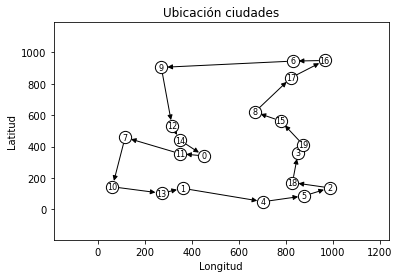

In [22]:
#!pip install PuLP
import pulp as lp

solucion_MIP = []

Tiempo_inicio = time.time()
prob = lp.LpProblem("TSP",lp.LpMinimize)

x=lp.LpVariable.dicts("x_var", [(i,j) for (i,j) in c_ij.keys()], lowBound=0,upBound=1,cat="Integer")
u=lp.LpVariable.dicts("u_var", [i for i in N], lowBound=0,cat="Continuous")

for i in N:
    prob += lp.lpSum(x[i,j] for j in N) == 1, "Lo que sale"+str(i)
    
for i in N:
    prob += lp.lpSum(x[j,i] for j in N) == 1, "Lo que entra"+str(i)
    
prob += u[0] ==1, "sale del depot"

for i in N:
    for j in N:
        if i!=j:
            if i!= 0 and j != 0:
                prob += u[i] - u[j] + 1 <= (len(N)-1)*(1-x[i,j])

prob += lp.lpSum(c_ij[i,j]*x[i,j] for (i,j) in c_ij.keys()), "OF"
prob.solve()
Tiempo_fin =time.time()-Tiempo_inicio

Route = []
print("Costo de la ruta OF = "+str(lp.value(prob.objective))+"$")
print(f"Tiempo de cómputo del modelo matemático {round(Tiempo_fin,5)} segundos")
FO_MIP = lp.value(prob.objective)
for (i,j) in c_ij.keys():
    if x[(i,j)].varValue > 0:
        Route.append((i,j))
Grafica_Ruta(N, Route)